We will start by importing the necessary libraries. We will use Numpy along with Tensorflow for computations, Pandas for basic Data Analysis and Matplotlib for plotting. We will also be using the preprocessing module of Scikit-Learn for One Hot Encoding the data.



In [3]:
# importing modules 
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder 

import warnings
warnings.filterwarnings("ignore")

Next we will be importing the dataset. We will be using a subset of the famous Iris dataset.



In [5]:
data = pd.read_csv('dataset.csv', header = None) 
print("Data Shape:", data.shape) 
  
print(data.head()) 

Data Shape: (100, 4)
   0    1    2  3
0  0  5.1  3.5  1
1  1  4.9  3.0  1
2  2  4.7  3.2  1
3  3  4.6  3.1  1
4  4  5.0  3.6  1


Now let’s get the feature matrix and the corresponding labels and visualize.



In [6]:
# Feature Matrix 
x_orig = data.iloc[:, 1:-1].values 
  
# Data labels 
y_orig = data.iloc[:, -1:].values 
  
print("Shape of Feature Matrix:", x_orig.shape) 
print("Shape Label Vector:", y_orig.shape) 

Shape of Feature Matrix: (100, 2)
Shape Label Vector: (100, 1)


Visualize the given data.



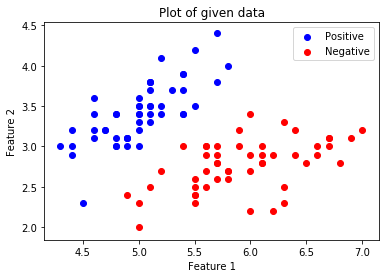

In [7]:

# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative') 
  
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of given data') 
plt.legend() 
  
plt.show() 


Now we will be One Hot Encoding the data for it to work with the algorithm. One hot encoding transforms categorical features to a format that works better with classification and regression algorithms. We will also be setting the Learning Rate and the number of Epochs.

In [8]:

# Creating the One Hot Encoder 
oneHot = OneHotEncoder() 
  
# Encoding x_orig 
oneHot.fit(x_orig) 
x = oneHot.transform(x_orig).toarray() 
  
# Encoding y_orig 
oneHot.fit(y_orig) 
y = oneHot.transform(y_orig).toarray() 
  
alpha, epochs = 0.0035, 500
m, n = x.shape 
print('m =', m) 
print('n =', n) 
print('Learning Rate =', alpha) 
print('Number of Epochs =', epochs) 

m = 100
n = 7
Learning Rate = 0.0035
Number of Epochs = 500


Now we will start creating the model by defining the placeholders X and Y, so that we can feed our training examples x and y into the optimizer during the training process. We will also be creating the trainable Variables W and b which can be optimized by the Gradient Descent Optimizer.

In [9]:
# There are n columns in the feature matrix 
# after One Hot Encoding. 
X = tf.placeholder(tf.float32, [None, n]) 
  
# Since this is a binary classification problem, 
# Y can take only 2 values. 
Y = tf.placeholder(tf.float32, [None, 2]) 
  
# Trainable Variable Weights 
W = tf.Variable(tf.zeros([n, 2])) 
  
# Trainable Variable Bias 
b = tf.Variable(tf.zeros([2])) 


Now declare the Hypothesis, Cost function, Optimizer and Global Variables Initializer.



In [10]:
# Hypothesis 
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 
  
# Sigmoid Cross Entropy Cost Function 
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
                    logits = Y_hat, labels = Y) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer( 
         learning_rate = alpha).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 


Begin the training process inside a Tensorflow Session.




In [11]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Lists for storing the changing Cost and Accuracy in every Epoch 
    cost_history, accuracy_history = [], [] 
      
    # Iterating through all the epochs 
    for epoch in range(epochs): 
        cost_per_epoch = 0
          
        # Running the Optimizer 
        sess.run(optimizer, feed_dict = {X : x, Y : y}) 
          
        # Calculating cost on current Epoch 
        c = sess.run(cost, feed_dict = {X : x, Y : y}) 
          
        # Calculating accuracy on current Epoch 
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                          tf.argmax(Y, 1)) 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                                 tf.float32)) 
          
        # Storing Cost and Accuracy to the history 
        cost_history.append(sum(sum(c))) 
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) 
          
        # Displaying result on current Epoch 
        if epoch % 100 == 0 and epoch != 0: 
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1])) 
      
    Weight = sess.run(W) # Optimized Weight 
    Bias = sess.run(b)   # Optimized Bias 
      
    # Final Accuracy 
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                      tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,  
                                             tf.float32)) 
    print("\nAccuracy:", accuracy_history[-1], "%") 

Epoch 100 Cost: 125.70020294189453
Epoch 200 Cost: 120.6471176147461
Epoch 300 Cost: 118.15159606933594
Epoch 400 Cost: 116.54996871948242

Accuracy: 91.00000262260437 %


Let’s plot the change of cost over the epochs.



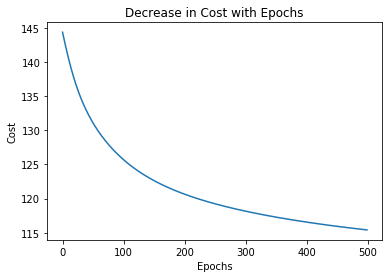

In [12]:
plt.plot(list(range(epochs)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
  
plt.show() 

Plot the change of accuracy over the epochs.



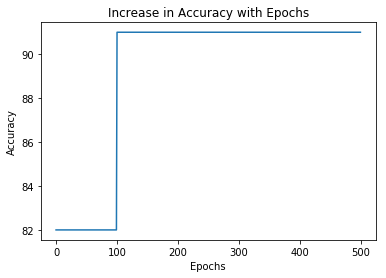

In [13]:

plt.plot(list(range(epochs)), accuracy_history) 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Increase in Accuracy with Epochs') 
  
plt.show() 


Now we will be plotting the Decision Boundary for our trained classifier. A decision boundary is a hypersurface that partitions the underlying vector space into two sets, one for each class.



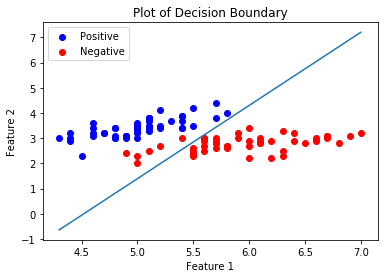

In [16]:
# Calculating the Decision Boundary 
decision_boundary_x = np.array([np.min(x_orig[:, 0]), 
                               np.max(x_orig[:, 0])]) 
  
decision_boundary_y = (- 1.0 / Weight[0]) *(decision_boundary_x * Weight + Bias) 
  
decision_boundary_y = [sum(decision_boundary_y[:, 0]),  
                       sum(decision_boundary_y[:, 1])] 
  
# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig))  
                                    if y_orig[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], 
  color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], 
   color = 'red', label = 'Negative') 
  
# Plotting the Decision Boundary 
plt.plot(decision_boundary_x, decision_boundary_y) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of Decision Boundary') 
plt.legend() 
  
plt.show() 